In [1]:
# source /cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-centos7-gcc11-opt/setup.sh
import numpy as np
import ROOT
import math
import h5py
import xml.etree.ElementTree as ET
import os

Welcome to JupyROOT 6.30/04


In [2]:
# Maximum numbers of each object
NUM_JETS = 10
NUM_ELECTRONS = 6
NUM_MUONS = 6
NUM_PHOTONS = 6
NUM_L1 = 6

In [3]:
# Min/max pt and eta values
MIN_JET_PT = 0
MIN_PHELMU_PT = 0
MAX_ETA = 1000

In [4]:
# List of triggers that we want to keep L1 events from for HLT training
L1_save_trigs = [
    'L1_3J35p0ETA23',
    'L1_3J50',
    'L1_4J15',
    'L1_4J15p0ETA25',
    'L1_4J20',
    'L1_5J15p0ETA25',
    'L1_J85_3J30',
    'L1_HT150-J20s5pETA31_MJJ-400-CF',
    'L1_HT190-J15s5pETA21',
    'L1_SC111-CJ15',
    'L1_DR-TAU20ITAU12I-J25',
    'L1_TAU100',
    'L1_TAU20IM_2TAU12IM_4J12p0ETA25',
    'L1_TAU25IM_2TAU20IM_2J25_3J20',
    'L1_TAU60_2TAU40',
    'L1_TAU60_DR-TAU20ITAU12I',
    'L1_2MU8F',
    'L1_3MU3VF',
    'L1_3MU5VF',
    'L1_4MU3V',
    'L1_MU10BOM',
    'L1_MU12BOM',
    'L1_MU14FCH',
    'L1_MU5VF_3MU3VF',
    'L1_MU8VF_2MU5VF',
    'L1_BPH-0M9-EM7-EM5_2MU3V',
    'L1_2EM8VH_MU8F',
    'L1_2J15_XE55',
    'L1_3J15p0ETA25_XE40',
    'L1_EM15VHI_2TAU12IM_4J12',
    'L1_EM15VHI_2TAU12IM_XE35',
    'L1_EM15VH_MU8F',
    'L1_MU8F_TAU12IM_3J12',
    'L1_MU8F_TAU12IM_XE35',
    'L1_MU8F_TAU20IM',
    'L1_TAU40_2TAU12IM_XE40',
    'L1_MJJ-500-NFF',
    'L1_MU18VFCH',
    'L1_J45p0ETA21_3J15p0ETA25',
    'L1_MU8F_2J15_J20',
    'L1_2EM20VH',
    'L1_XE55',
    'L1_EM18VHI_MJJ-300',
    'L1_2EM15VHI',
    'L1_J120',
    'L1_EM20VH_3EM10VH',
    'L1_MU5VF_EMPTY',
    'L1_J40p0ETA25_2J25_J20p31ETA49',
    'L1_2J50_XE40',
    'L1_J25p0ETA23_2J15p31ETA49',
    'L1_2MU5VF_3MU3V'
]

In [5]:
# List of HLT triggers that we want to look at to study HLT overlap
HLT_save_trigs = [
    'HLT_e26_lhtight_ivarloose_L1eEM26M',
    'HLT_e60_lhmedium_L1eEM26M',
    'HLT_e140_lhloose_L1eEM26M',
    'HLT_e300_etcut_L1eEM26M',
    'HLT_e140_lhloose_noringer_L1eEM26M',
    'HLT_e30_lhloose_nopix_lrtmedium_L1eEM26M',
    'HLT_2e17_lhvloose_L12eEM18M',
    'HLT_2e24_lhvloose_L12eEM24L',
    'HLT_e24_lhvloose_2e12_lhvloose_L1eEM24L_3eEM12L',
    'HLT_g140_loose_L1eEM26M',
    'HLT_g300_etcut_L1eEM26M',
    'HLT_2g20_tight_icaloloose_L12eEM18M',
    'HLT_2g22_tight_L12eEM18M',
    'HLT_2g50_loose_L12eEM24L',
    'HLT_g35_medium_g25_medium_L12eEM24L',
    'HLT_mu24_ivarmedium_L1MU14FCH',
    'HLT_mu50_L1MU14FCH',
    'HLT_mu60_0eta105_msonly_L1MU14FCH',
    'HLT_mu60_L1MU14FCH',
    'HLT_mu80_msonly_3layersEC_L1MU14FCH',
    'HLT_mu20_LRT_d0loose_L1MU14FCH	',
    'HLT_2mu10_l2mt_L1MU10BOM',
    'HLT_2mu14_L12MU8F',
    'HLT_mu20_ivarmedium_mu8noL1_L1MU14FCH',
    'HLT_mu22_mu8noL1_L1MU14FCH',
    'HLT_3mu6_L13MU5VF',
    'HLT_3mu6_msonly_L13MU5VF',
    'HLT_mu20_2mu4noL1_L1MU14FCH',
    'HLT_4mu4_L14MU3V',
    'HLT_mu10_ivarmedium_mu10_10invmAB70_L12MU8F',
    'HLT_mu20_ivarmedium_mu4noL1_10invmAB70_L1MU14FCH',
    'HLT_mu20_mu2noL1_invmJPsiOS_L1MU14FCH',
    'HLT_e7_lhmedium_mu24_L1MU14FCH',
    'HLT_e17_lhloose_mu14_L1EM15VH_MU8F',
    'HLT_e26_lhmedium_mu8noL1_L1EM22VHI',
    'HLT_2e12_lhloose_mu10_L12EM8VH_MU8F',
    'HLT_e9_lhvloose_mu20_mu8noL1_L1MU14FCH',
    'HLT_e12_lhloose_2mu10_L12MU8F',
    'HLT_g25_medium_mu24_L1MU14FCH',
    'HLT_g35_loose_mu18_L1EM24VHI',
    'HLT_2g10_loose_mu20_L1MU14FCH',
    'HLT_tau160_mediumRNN_tracktwoMVA_L1TAU100',
    'HLT_tau180_mediumRNN_tracktwoLLP_L1TAU100	',
    'HLT_tau80_mediumRNN_tracktwoMVA_tau60_mediumRNN_tracktwoMVA_03dRAB_L1TAU60_2TAU40',
    'HLT_tau80_mediumRNN_tracktwoLLP_tau60_mediumRNN_tracktwoLLP_03dRAB_L1TAU60_2TAU40',
    'HLT_tau160_mediumRNN_tracktwoMVA_L1eTAU140',
    'HLT_tau180_mediumRNN_tracktwoLLP_L1eTAU140	',
    'HLT_tau80_mediumRNN_tracktwoMVA_tau60_mediumRNN_tracktwoMVA_03dRAB_L1eTAU80_2eTAU60',
    'HLT_tau80_mediumRNN_tracktwoLLP_tau60_mediumRNN_tracktwoLLP_03dRAB_L1eTAU80_2eTAU60',
    'HLT_e24_lhmedium_ivarloose_tau20_mediumRNN_tracktwoMVA_03dRAB_L1eEM26M',
    'HLT_mu20_ivarloose_tau20_mediumRNN_tracktwoMVA_03dRAB_L1MU14FCH',
    'HLT_mu14_ivarloose_tau35_mediumRNN_tracktwoMVA_03dRAB_L1MU8F_TAU20IM',
    'HLT_mu14_ivarloose_tau25_mediumRNN_tracktwoMVA_03dRAB_L1MU8F_TAU12IM_3J12',
    'HLT_xe55_cell_xe70_tcpufit_xe90_pfsum_vssk_L1XE50',
    'HLT_xe55_cell_xe70_tcpufit_xe95_pfsum_cssk_L1XE50',
    'HLT_xe60_cell_xe95_pfsum_cssk_L1XE50',
    'HLT_xe65_cell_xe100_mhtpufit_pf_L1XE50',
    'HLT_xe65_cell_xe105_mhtpufit_em_L1XE50',
    'HLT_xe75_cell_xe65_tcpufit_xe90_trkmht_L1XE50',
    'HLT_xe65_cell_xe90_pfopufit_L1XE50',
    'HLT_xe80_cell_xe115_tcpufit_L1XE50	',
    'HLT_e70_lhloose_xe70_cell_L1eEM26M',
    'HLT_g90_loose_xe90_cell_L1eEM26M',
    'HLT_mu14_tau25_mediumRNN_tracktwoMVA_xe50_cell_03dRAB_L1MU8F_TAU12IM_XE35',
    'HLT_e17_lhmedium_tau25_mediumRNN_tracktwoMVA_xe50_cell_03dRAB_L1EM15VHI_2TAU12IM_XE35',
    'HLT_tau60_mediumRNN_tracktwoMVA_tau25_mediumRNN_tracktwoMVA_xe50_cell_03dRAB_L1TAU40_2TAU12IM_XE40',
    'HLT_j420_pf_ftf_preselj225_L1J100',
    'HLT_j400_pf_ftf_preselj225_L1J100',
    'HLT_j220f_L1J75p31ETA49',
    'HLT_j460_a10sd_cssk_pf_jes_ftf_preselj225_L1J100',
    'HLT_j460_a10sd_cssk_pf_jes_ftf_preselj225_L1SC111-CJ15',
    'HLT_j460_a10t_lcw_jes_L1J100',
    'HLT_j460_a10t_lcw_jes_L1SC111-CJ15',
    'HLT_j460_a10r_L1J100',
    'HLT_j460_a10r_L1SC111-CJ15',
    'HLT_j460_a10_lcw_subjes_L1J100',
    'HLT_j460_a10_lcw_subjes_L1SC111-CJ15',
    'HLT_j420_35smcINF_a10sd_cssk_pf_jes_ftf_preselj225_L1J100',
    'HLT_j420_35smcINF_a10sd_cssk_pf_jes_ftf_preselj225_L1SC111-CJ15',
    'HLT_j420_35smcINF_a10t_lcw_jes_L1J100',
    'HLT_j420_35smcINF_a10t_lcw_jes_L1SC111-CJ15',
    'HLT_j0_HT1000_L1HT190-J15s5pETA21',
    'HLT_j0_HT1000_L1J100',
    'HLT_j0_HT1000_pf_ftf_preselcHT450_L1HT190-J15s5pETA21',
    'HLT_j0_HT940_pf_ftf_preselcHT450_L1HT190-J15s5pETA21',
    'HLT_j0_HT1000_pf_ftf_preselj180_L1HT190-J15s5pETA21',
    'HLT_j0_HT940_pf_ftf_preselj180_L1HT190-J15s5pETA21',
    'HLT_j0_HT1000_pf_ftf_preselj180_L1J100',
    'HLT_2j250c_j120c_pf_ftf_presel2j180XXj80_L1J100',
    'HLT_3j200_pf_ftf_L1J100',
    'HLT_4j115_pf_ftf_presel4j85_L13J50',
    'HLT_4j110_pf_ftf_presel4j85_L13J50',
    'HLT_4j120_L13J50',
    'HLT_5j70c_pf_ftf_presel5c50_L14J15',
    'HLT_5j65c_pf_ftf_presel5c55_L14J15',
    'HLT_5j85_pf_ftf_presel5j50_L14J15',
    'HLT_5j80_pf_ftf_presel5j50_L14J15',
    'HLT_5j80_pf_ftf_presel5j55_L14J15',
    'HLT_6j35c_020jvt_pf_ftf_presel6c25_L14J15+',
    'HLT_6j55c_pf_ftf_presel6j40_L14J15',
    'HLT_6j70_pf_ftf_presel6j40_L14J15',
    'HLT_7j45_pf_ftf_presel7j30_L14J15',
    'HLT_10j40_pf_ftf_presel7j30_L14J15',
    'HLT_2j330_35smcINF_a10sd_cssk_pf_jes_ftf_presel2j225_L1J100',
    'HLT_2j330_35smcINF_a10sd_cssk_pf_jes_ftf_presel2j225_L1SC111-CJ15',
    'HLT_2j330_35smcINF_a10t_lcw_jes_L1J100',
    'HLT_2j330_35smcINF_a10t_lcw_jes_L1SC111-CJ15',
    'HLT_j360_60smcINF_j360_a10sd_cssk_pf_jes_ftf_presel2j225_L1SC111-CJ15',
    'HLT_j360_60smcINF_j360_a10t_lcw_jes_L1SC111-CJ15',
    'HLT_j370_35smcINF_j370_a10sd_cssk_pf_jes_ftf_presel2j225_L1SC111-CJ15',
    'HLT_j370_35smcINF_j370_a10t_lcw_jes_L1SC111-CJ15',
    'HLT_j210_0eta290_020jvt_bgn170_pf_ftf_preselj180_L1J100',
    'HLT_j280_0eta290_020jvt_bgn177_pf_ftf_preselj225_L1J100',
    'HLT_j340_0eta290_020jvt_bgn185_pf_ftf_preselj225_L1J100',
    'HLT_j50_0eta290_020jvt_bgn170_2j45f_pf_ftf_preselj45XX2f40_L1J25p0ETA23_2J15p31ETA49',
    'HLT_j80_0eta290_020jvt_bgn170_j60_0eta290_020jvt_bgn185_j45f_pf_ftf_preselj60XXj45XXf40_L1J40p0ETA25_2J25_J20p31ETA49',
    'HLT_j75c_j55_j45f_SHARED_2j45_0eta290_020jvt_bgn160_pf_ftf_preselc60XXj45XXf40_L1J40p0ETA25_2J25_J20p31ETA49',
    'HLT_g25_medium_4j35a_j0_DJMASS1000j35_L1eEM26M',
    'HLT_g20_tight_j35_0eta290_020jvt_bgn177_3j35a_j0_DJMASS500j35_pf_ftf_L1EM18VHI_MJJ-300',
    'HLT_g25_tight_2j35_0eta290_020jvt_bgn177_­2j35a_pf_ftf_presel2a20b90XX2a20_L1eEM26M',
    'HLT_g25_tight_j35_0eta290_020jvt_bgn177_3j35a_j0_­DJMASS700j35_pf_ftf_­presela20b85XX3a20_­L1eEM26M',
    'HLT_e25_mergedtight_g35_medium_90invmAB_02dRAB_L12eEM24L',
    'HLT_g35_medium_tau25_dipion3_tracktwoMVA_L1TAU12_60invmAB_L1eEM26M',
    'HLT_g25_medium_tau25_singlepion_tracktwoMVA_50invmAB_L1eEM26M',
    'HLT_g25_medium_tau25_dipion1_tracktwoMVA_50invmAB_L1eEM26M',
    'HLT_g25_medium_tau25_dipion2_tracktwoMVA_50invmAB_L1eEM26M',
    'HLT_g25_medium_tau25_dikaonmass_tracktwoMVA_50invmAB_L1eEM26M',
    'HLT_g25_medium_tau25_kaonpi1_tracktwoMVA_50invmAB_L1eEM26M',
    'HLT_g25_medium_tau25_kaonpi2_tracktwoMVA_50invmAB_L1eEM26M',
    'HLT_j75c_020jvt_j50c_020jvt_j25c_020jvt_j20c_020jvt_SHARED_3j20c_020jvt_bgn182_pf_ftf_presel2c20XX2c20b85_L1J45p0ETA21_3J15p0ETA25',
    'HLT_j75c_020jvt_j50c_020jvt_j25c_020jvt_j20c_020jvt_SHARED_2j20c_020jvt_bgn177_pf_ftf_presel2c20XX2c20b85_L1J45p0ETA21_3J15p0ETA25',
    'HLT_j75c_020jvt_j50c_020jvt_j25c_020jvt_j20c_020jvt_SHARED_2j20c_020jvt_bgn177_pf_ftf_presel2c20XX2c20b85_L1MU8F_2J15_J20'
]

In [6]:
def sort_and_pad(in_data, max_objects):
    """input an object of size (4, num_objects), as well as the maximum number of objects wanted.
    in_data[0] corresponds to the pt array, and the other three are E, eta, phi."""
    
    indices = np.argsort(in_data[0])[-max_objects:][::-1] # indices that sort the in_data by pt
    arrs = []
    for array in in_data:

        # Sorting
        sorted_arr = array[indices]

        # Padding
        if len(array) < max_objects:
            sorted_arr = np.concatenate((sorted_arr, np.zeros(max_objects - len(array))))

        arrs.append(sorted_arr)
        
    
    arrs = np.array(arrs).T
    return np.array(arrs)

In [7]:
def make_mask(min_pt, max_eta, pt, eta):
    """Make a mask on pt and eta of event, in case I want to make any data cuts."""

    return [(pt > MIN_JET_PT) and (abs(eta) < MAX_ETA) for pt, eta in zip(pt, eta)]

In [8]:
def get_data(event, c_name, vars=['pt', 'm', 'eta', 'phi'], mask=None):
    """
    Extracts and processes data from a specified container within an event.

    event: The event object containing the data.
    c_name: Name of the container to get the data from.
    vars: List of the variables to pull from the container.
    mask: The mask to apply to the data, if applicable.
    max_objects: Maximum number of objects to retain after sorting and padding.
    return: Processed data from the specified container, after being sorted and padded.
    """
    data = []
    for var in vars:
        full_var_name = f"{c_name}_{var}"
        var_data = getattr(event, full_var_name)

        if mask is not None:
            masked_data = np.asarray([x for x, m in zip(var_data, mask) if m])
        else:
            masked_data = np.asarray([x for x in var_data]) # for some reason this syntax runs way faster!?

        data.append(masked_data)
    return data
    #return sort_and_pad(data, max_objects=max_objects)

# Usage example:
# jet_data = get_data(event, 'HLT_jet', vars=['pt', 'E', 'eta', 'phi'], mask=jet_mask, max_objects=NUM_JETS)

In [9]:
def make_ntuples(tree, h5_path, dataset_name):
    
    # Define empty arrays to be filled
    HLT_jet_list = []
    el_list = []
    LRT_el_list = []
    muon_list = []
    LRT_muon_list = []
    ph_list = []
    MET_list = []
    ev_lb_list = []
    pass_L1_unprescaled = []
    pass_HLT_unprescaled = []
    L1_egamma_list = []
    L1_muon_list = []
    L1_eFex_tau_list = []
    L1_jFex_tau_list = []
    L1_MET_list = []
    L1_jFexSR_jet_list = []
    L1_jFexLR_jet_list = []
    
    for i, event in enumerate(tree):
        if i >= 1000000: break
        
        # HLT Jets
        HLT_jet_data = get_data(event, 'HLT_jet', vars=['pt', 'E', 'eta', 'phi'])
        # HLT_jet_data = get_data(event, 'HLT_jet', vars=['pt', 'E', 'eta', 'phi'], mask=jet_mask)
        HLT_jet_list.append(sort_and_pad(HLT_jet_data, max_objects=NUM_JETS))

        # L1 SR Jets
        L1_jFexSR_jet_data = get_data(event, 'L1_jFexSRJet', vars=['et', 'eta', 'phi'])
        L1_jFexSR_jet_list.append(sort_and_pad(L1_jFexSR_jet_data, max_objects=NUM_JETS))

        # L1 LR Jets
        L1_jFexLR_jet_data = get_data(event, 'L1_jFexLRJet', vars=['et', 'eta', 'phi'])
        L1_jFexLR_jet_list.append(sort_and_pad(L1_jFexLR_jet_data, max_objects=NUM_JETS))
    
        # Electrons
        el_data = get_data(event, 'HLT_el', vars=['pt', 'm', 'eta', 'phi'])
        el_list.append(sort_and_pad(el_data, max_objects=NUM_ELECTRONS))
    
        # LRT Electrons
        LRT_el_data = get_data(event, 'HLT_el_LRT', vars=['pt', 'm', 'eta', 'phi'])
        LRT_el_list.append(sort_and_pad(LRT_el_data, max_objects=NUM_ELECTRONS))

        # L1 Egammas
        L1_egammas_data = get_data(event, 'L1Egamma', vars=['et', 'eta', 'phi'])
        L1_egamma_list.append(sort_and_pad(L1_egammas_data, max_objects=NUM_ELECTRONS))
    
        # Muons
        muon_data = get_data(event, 'HLT_muon', vars=['pt', 'm', 'eta', 'phi'])
        muon_list.append(sort_and_pad(muon_data, max_objects=NUM_ELECTRONS))
    
        # LRT Muons
        LRT_muon_data = get_data(event, 'HLT_muon_LRT', vars=['pt', 'm', 'eta', 'phi'])
        LRT_muon_list.append(sort_and_pad(LRT_muon_data, max_objects=NUM_ELECTRONS))

        # L1 Muons
        L1_muon_data = get_data(event, 'L1Muon', vars=['et', 'eta', 'phi'])
        L1_muon_list.append(sort_and_pad(L1_muon_data, max_objects=NUM_ELECTRONS))
        
        # Photons
        ph_data = get_data(event, 'HLT_ph', vars=['pt', 'm', 'eta', 'phi'])
        ph_list.append(sort_and_pad(ph_data, max_objects=NUM_ELECTRONS))

        # L1 eTaus 
        L1_eFex_tau_data = get_data(event, 'L1Tau_eFex', vars=['et', 'eta', 'phi'])
        L1_eFex_tau_list.append(sort_and_pad(L1_eFex_tau_data, max_objects=NUM_ELECTRONS))

        # L1 jTaus 
        L1_jFex_tau_data = get_data(event, 'L1Tau_jFex', vars=['et', 'eta', 'phi'])
        L1_jFex_tau_list.append(sort_and_pad(L1_jFex_tau_data, max_objects=NUM_ELECTRONS))
    
        # HLT MET
        MET_data = [np.float32(event.trigmetMet), 0, 0, np.float32(event.trigmetMetPhi)]
        MET_list.append(MET_data)

        # L1 MET
        L1_MET_data = [np.float32(event.L1METMet), 0, np.float32(event.L1METMetPhi)]
        L1_MET_list.append(L1_MET_data)
    
        # Trigger Decisions
        trig_data = [str(trigger) for trigger in event.passedTriggers]
    
        # Check if the event passed any of the unprescaled physics triggers from the list:
        pass_L1_unprescaled.append(1*any(trigger in L1_save_trigs for trigger in trig_data)) # 0=no 1=yes
    
        # Check if the event passed any of the unprescaled physics triggers from the list:
        pass_HLT_unprescaled.append(1*any(trigger in HLT_save_trigs for trigger in trig_data)) # 0=no 1=yes
        
    
        # Print progress
        if (i % 10000) == 1:
            print(f'Progress: {i} / {nevents}')

    # Write to h5
    with h5py.File(f'{h5_path}/{dataset_name}_07-17-2024.h5', 'w') as hf:
        hf.create_dataset("HLT_jets", data=np.array(HLT_jet_list))
        hf.create_dataset("L1_jFexSR_jets", data=np.array(L1_jFexSR_jet_list))
        hf.create_dataset("L1_jFexLR_jets", data=np.array(L1_jFexLR_jet_list))
        hf.create_dataset("HLT_electrons", data=np.array(el_list))
        hf.create_dataset("LRT_electrons", data=np.array(LRT_el_list))
        hf.create_dataset("L1_egammas", data=np.array(L1_egamma_list))
        hf.create_dataset("HLT_muons", data=np.array(muon_list))
        hf.create_dataset("LRT_muons", data=np.array(LRT_muon_list))
        hf.create_dataset("L1_muons", data=np.array(L1_muon_list))
        hf.create_dataset("L1_eFex_taus", data=np.array(L1_eFex_tau_list))
        hf.create_dataset("L1_jFex_taus", data=np.array(L1_jFex_tau_list))
        hf.create_dataset("HLT_photons", data=np.array(ph_list))
        hf.create_dataset("HLT_MET", data=np.array(MET_list))
        hf.create_dataset("L1_MET", data=np.array(L1_MET_list))
        hf.create_dataset("pass_L1_unprescaled", data=np.array(pass_L1_unprescaled))
        hf.create_dataset("pass_HLT_unprescaled", data=np.array(pass_HLT_unprescaled))

In [10]:
base_dir = '/eos/home-m/mmcohen/ntuples/MC_trees_07-17-2024'
for subdir in os.listdir(base_dir):
    subdir_path = os.path.join(base_dir, subdir)
    if os.path.isdir(subdir_path):
        root_file = os.listdir(subdir_path)[0] # each dir contains only one file
        file_path = os.path.join(subdir_path, root_file)
        dataset_name = subdir.split('_')[0].split('.')[-1]
        if 'JZ4' not in dataset_name and 'qqa' not in dataset_name: continue
        
        # Process the data
        f = ROOT.TFile.Open(file_path)
        td = f.Get("EB_Tree")
        tree = td.Get("nominal")
        nevents = tree.GetEntries() # number of events
        print(f'Starting processing of {dataset_name} with {nevents} events!')
        make_ntuples(tree, h5_path='/eos/home-m/mmcohen/ntuples/MC_07-17-2024', dataset_name=dataset_name)

Starting processing of jjJZ4 with 650000 events!
Progress: 1 / 650000
Progress: 10001 / 650000
Progress: 20001 / 650000
Progress: 30001 / 650000
Progress: 40001 / 650000
Progress: 50001 / 650000
Progress: 60001 / 650000
Progress: 70001 / 650000
Progress: 80001 / 650000
Progress: 90001 / 650000
Progress: 100001 / 650000
Progress: 110001 / 650000
Progress: 120001 / 650000
Progress: 130001 / 650000
Progress: 140001 / 650000
Progress: 150001 / 650000
Progress: 160001 / 650000
Progress: 170001 / 650000
Progress: 180001 / 650000
Progress: 190001 / 650000
Progress: 200001 / 650000
Progress: 210001 / 650000
Progress: 220001 / 650000
Progress: 230001 / 650000
Progress: 240001 / 650000
Progress: 250001 / 650000
Progress: 260001 / 650000
Progress: 270001 / 650000
Progress: 280001 / 650000
Progress: 290001 / 650000
Progress: 300001 / 650000
Progress: 310001 / 650000
Progress: 320001 / 650000
Progress: 330001 / 650000
Progress: 340001 / 650000
Progress: 350001 / 650000
Progress: 360001 / 650000
Pro

In [23]:
# file_path = '/eos/home-m/mmcohen/git_repos/TLA/tla-steering-run-3/data/trees/MC_local_07-15-2024_v2_-1/data-tree/mc23_valid.801167.Py8EG_A14NNPDF23LO_jj_JZ2.merge.AOD.e8514_e8516_s4041_s4055_r14332_r14394.root'
# f = ROOT.TFile.Open(file_path)
# td = f.Get("EB_Tree")
# tree = td.Get("nominal")
# nevents = tree.GetEntries() # number of events
# print(f'Starting processing with {nevents} events!')
# make_ntuples(tree, h5_path='./', dataset_name='localv2')

Starting processing with 5000 events!
Progress: 1 / 5000


# ___________________

In [32]:
# with h5py.File('../ntuples/L1_MC/ZZ4lep_05-30-2024.h5', 'w') as hf:
#     hf.create_dataset("HLT_jets", data=np.array(HLT_jet_list))
#     hf.create_dataset("L1_jFexSR_jets", data=np.array(L1_jFexSR_jet_list))
#     hf.create_dataset("L1_jFexLR_jets", data=np.array(L1_jFexLR_jet_list))
#     hf.create_dataset("HLT_electrons", data=np.array(el_list))
#     hf.create_dataset("LRT_electrons", data=np.array(LRT_el_list))
#     hf.create_dataset("L1_egammas", data=np.array(L1_egamma_list))
#     hf.create_dataset("HLT_muons", data=np.array(muon_list))
#     hf.create_dataset("LRT_muons", data=np.array(LRT_muon_list))
#     hf.create_dataset("L1_muons", data=np.array(L1_muon_list))
#     hf.create_dataset("L1_eFex_taus", data=np.array(L1_eFex_tau_list))
#     hf.create_dataset("L1_jFex_taus", data=np.array(L1_jFex_tau_list))
#     hf.create_dataset("HLT_photons", data=np.array(ph_list))
#     hf.create_dataset("HLT_MET", data=np.array(MET_list))
#     hf.create_dataset("L1_MET", data=np.array(L1_MET_list))
#     hf.create_dataset("pass_L1_unprescaled", data=np.array(pass_L1_unprescaled))
#     hf.create_dataset("pass_HLT_unprescaled", data=np.array(pass_HLT_unprescaled))

In [24]:
# Read file
with h5py.File('./localv2_07-15-2024.h5', 'r') as hf:
    HLT_jets = hf['HLT_jets'][:]
    L1_jFexSR_jets = hf['L1_jFexSR_jets'][:]
    L1_jFexLR_jets = hf['L1_jFexLR_jets'][:]
    HLT_electrons = hf['HLT_electrons'][:]
    LRT_electrons = hf['LRT_electrons'][:]
    L1_egammas = hf['L1_egammas'][:]
    HLT_muons = hf['HLT_muons'][:]
    LRT_muons = hf['LRT_muons'][:]
    L1_muons = hf['L1_muons'][:]
    L1_eFex_taus = hf['L1_eFex_taus'][:]
    L1_jFex_taus = hf['L1_jFex_taus'][:]
    HLT_photons = hf['HLT_photons'][:]
    HLT_MET = hf['HLT_MET'][:].reshape(-1, 1, 4)  # Broadcasting MET
    L1_MET = hf['L1_MET'][:].reshape(-1, 1, 3)
    pass_L1_unprescaled = hf["pass_L1_unprescaled"][:]
    pass_HLT_unprescaled = hf["pass_HLT_unprescaled"][:]

In [25]:
print(f'HLT jets: {HLT_jets.shape}')
print(f'L1_jFexSR_jets: {L1_jFexSR_jets.shape}')
print(f'L1_jFexLR_jets: {L1_jFexLR_jets.shape}')
print(f'HLT electrons: {HLT_electrons.shape}')
print(f'LRT_electrons: {LRT_electrons.shape}')
print(f'L1 egammas: {L1_egammas.shape}')
print(f'HLT muons: {HLT_muons.shape}')
print(f'LRT_muons: {LRT_muons.shape}')
print(f'L1 muons: {L1_muons.shape}')
print(f'L1_eFex_taus: {L1_eFex_taus.shape}')
print(f'L1_jFex_taus: {L1_jFex_taus.shape}')
print(f'HLT photons: {HLT_photons.shape}')
print(f'HLT MET: {HLT_MET.shape}')
print(f'L1 MET: {L1_MET.shape}')
print(f'pass_L1_unprescaled: {pass_L1_unprescaled.shape}')
print(f'pass_HLT_unprescaled: {pass_HLT_unprescaled.shape}')

HLT jets: (5000, 10, 4)
L1_jFexSR_jets: (5000, 10, 3)
L1_jFexLR_jets: (5000, 10, 3)
HLT electrons: (5000, 6, 4)
LRT_electrons: (5000, 6, 4)
L1 egammas: (5000, 6, 3)
HLT muons: (5000, 6, 4)
LRT_muons: (5000, 6, 4)
L1 muons: (5000, 6, 3)
L1_eFex_taus: (5000, 6, 3)
L1_jFex_taus: (5000, 6, 3)
HLT photons: (5000, 6, 4)
HLT MET: (5000, 1, 4)
L1 MET: (5000, 1, 3)
pass_L1_unprescaled: (5000,)
pass_HLT_unprescaled: (5000,)


## These plots were flipping phi when fpgaNumber == 3

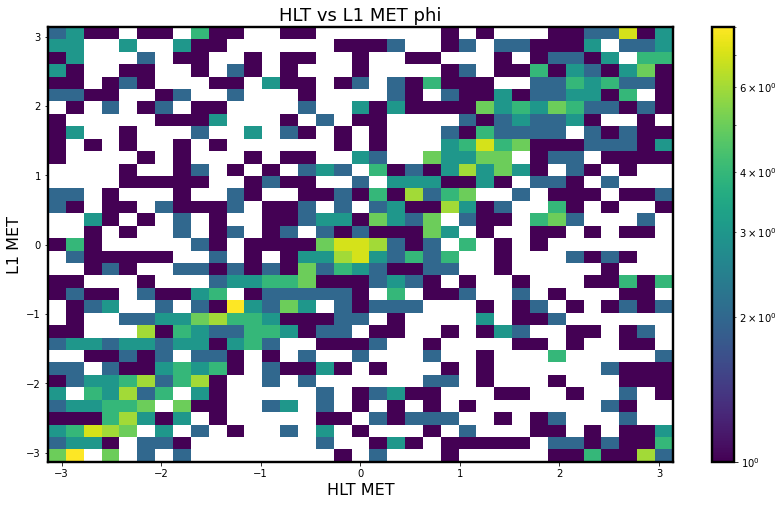

In [20]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(14, 8))
plt.rcParams['axes.linewidth'] = 2.4

mask = HLT_MET[:, 0, 0] == -999
plt.hist2d(HLT_MET[:, 0, -1][~mask], L1_MET[:, 0, -1][~mask], bins=35, cmap='viridis', norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.xlabel(f'HLT MET', fontsize=16)
plt.ylabel(f'L1 MET', fontsize=16)
plt.title(f'HLT vs L1 MET phi', fontsize=18)
plt.show()

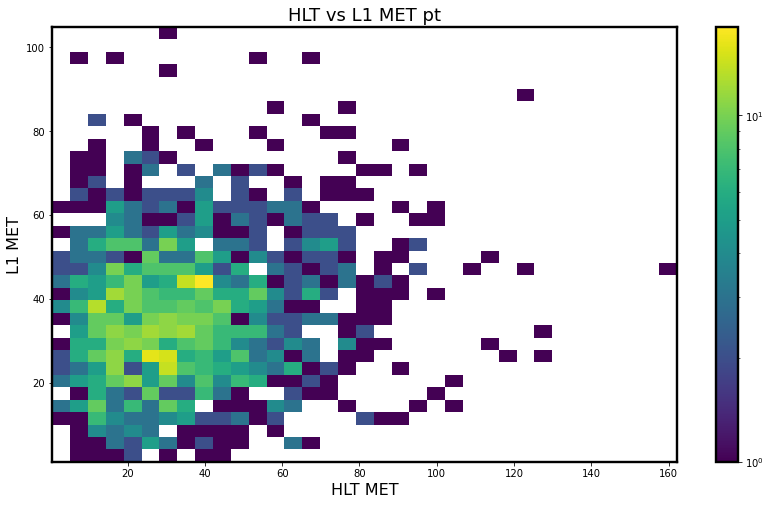

In [21]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(14, 8))
plt.rcParams['axes.linewidth'] = 2.4

mask = HLT_MET[:, 0, 0] == -999
plt.hist2d(HLT_MET[:, 0, 0][~mask], L1_MET[:, 0, 0][~mask], bins=35, cmap='viridis', norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.xlabel(f'HLT MET', fontsize=16)
plt.ylabel(f'L1 MET', fontsize=16)
plt.title(f'HLT vs L1 MET pt', fontsize=18)
plt.show()

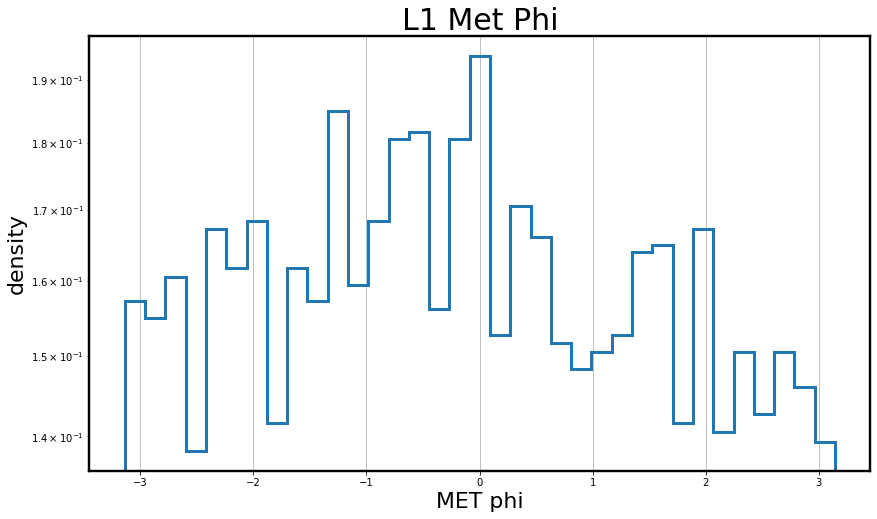

In [22]:
plt.figure(figsize=(14, 8))

#plt.hist(dataset[data_name]['HLT_data'][:, idx_1[object], idx_2[var]][HLT_mask], bins=bins[var], label='HLT_data', histtype='step', density=True, fill=False, linewidth=3, weights=dataset[data_name]['weights'][HLT_mask])
plt.hist(L1_MET[:, 0, -1], bins=35, label='L1_MET_phi', histtype='step', density=True, fill=False, linewidth=3)

plt.yscale('log')
plt.xlabel(f'MET phi', fontsize=22)
plt.ylabel('density', fontsize=22)
plt.title(f'L1 Met Phi', fontsize=30)
plt.grid()
#plt.legend(fontsize=18)
plt.show()

## Okay now let's try out flipping when fpgaNumber == 0

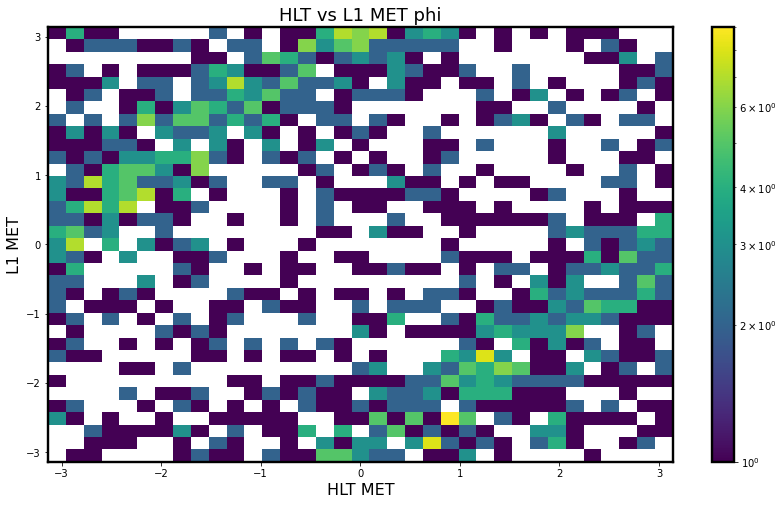

In [26]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(14, 8))
plt.rcParams['axes.linewidth'] = 2.4

mask = HLT_MET[:, 0, 0] == -999
plt.hist2d(HLT_MET[:, 0, -1][~mask], L1_MET[:, 0, -1][~mask], bins=35, cmap='viridis', norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.xlabel(f'HLT MET', fontsize=16)
plt.ylabel(f'L1 MET', fontsize=16)
plt.title(f'HLT vs L1 MET phi', fontsize=18)
plt.show()

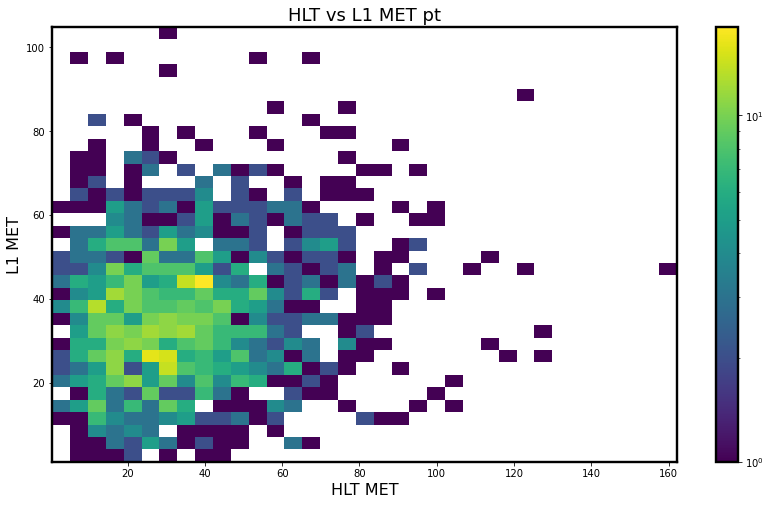

In [27]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(14, 8))
plt.rcParams['axes.linewidth'] = 2.4

mask = HLT_MET[:, 0, 0] == -999
plt.hist2d(HLT_MET[:, 0, 0][~mask], L1_MET[:, 0, 0][~mask], bins=35, cmap='viridis', norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.xlabel(f'HLT MET', fontsize=16)
plt.ylabel(f'L1 MET', fontsize=16)
plt.title(f'HLT vs L1 MET pt', fontsize=18)
plt.show()

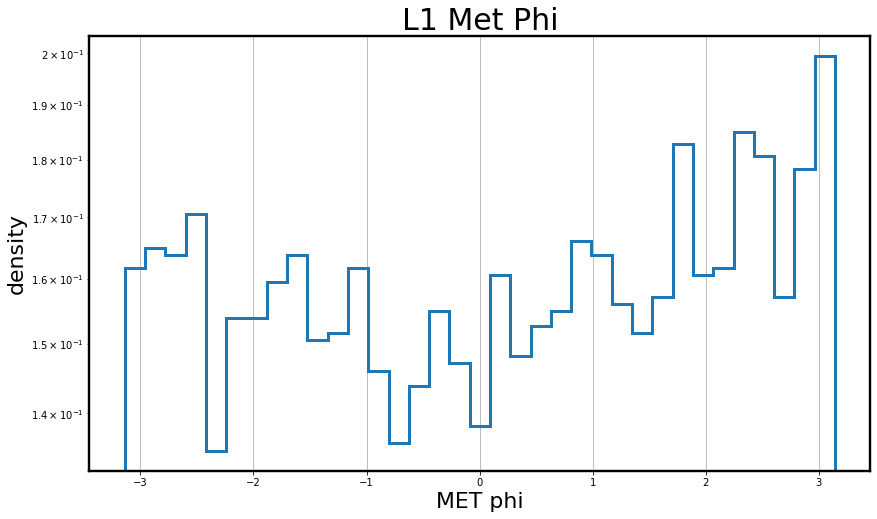

In [28]:
plt.figure(figsize=(14, 8))

#plt.hist(dataset[data_name]['HLT_data'][:, idx_1[object], idx_2[var]][HLT_mask], bins=bins[var], label='HLT_data', histtype='step', density=True, fill=False, linewidth=3, weights=dataset[data_name]['weights'][HLT_mask])
plt.hist(L1_MET[:, 0, -1], bins=35, label='L1_MET_phi', histtype='step', density=True, fill=False, linewidth=3)

plt.yscale('log')
plt.xlabel(f'MET phi', fontsize=22)
plt.ylabel('density', fontsize=22)
plt.title(f'L1 Met Phi', fontsize=30)
plt.grid()
#plt.legend(fontsize=18)
plt.show()